# Hidden-Layer-Perceptron for XOR

https://iamtrask.github.io/2015/07/12/basic-python-network/
https://chih-ling-hsu.github.io/2017/08/30/NN-XOR

### Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Definition of activation function

In [2]:
# sigmoid function
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

### XOR example data

In [3]:
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# output dataset            
y = np.array([[0,1,1,0]]).T
print(X)
print(y)

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
[[0]
 [1]
 [1]
 [0]]


### Initialisation of weights

In [4]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# syn0=First layer of weights, Synapse 0, connecting l0 to l1.
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,4)) - 1 

# syn0=Second layer of weights, Synapse 1 connecting l1 to l2.
syn1 = 2*np.random.random((4,1)) - 1

print(syn0)
print(syn1)

[[-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]]
[[-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]]


### Algorithm of hidden-layer-perceptron with backpropagation and gradient descent

In [5]:
est_errors=[]

iterations=60000
for j in range(iterations):

    # (1) Feed forward through layers 0, 1, and 2
    l0 = X #First Layer of the Network, specified by the input data
    l1 = sigmoid(np.dot(l0,syn0)) #Second Layer of the Network, otherwise known as the hidden layer
    l2 = sigmoid(np.dot(l1,syn1)) #Final Layer of the Network, which is our hypothesis, 
                                 #and should approximate the correct answer as we train.

    # (2) Backpropagations:
    # how much did we miss the target value?
    l2_error = y - l2 #This is the amount that the neural network "missed".
    est_errors.append(np.mean(np.abs(l2_error)))
    
    if (j% 5000) == 0:
        print("Error:" + str(np.mean(np.abs(l2_error))))
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*sigmoid(l2,deriv=True) #This is the error of the network scaled by the confidence. 
    #It's almost identical to the error except that very confident errors are muted.

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T) #Weighting l2_delta by the weights in syn1, we can calculate 
                                    #the error in the middle/hidden layer.
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * sigmoid(l1,deriv=True) #This is the l1 error of the network scaled by the confidence. 
    #Again, it's almost identical to the l1_error except that confident errors are muted.

    # (3) Update weights
    syn1 += l1.T.dot(l2_delta) 
    syn0 += l0.T.dot(l1_delta)

Error:0.49641003190272537
Error:0.013018434775309309
Error:0.008584525653247159
Error:0.006803777931641752
Error:0.0057894598625078085
Error:0.005116384388543916
Error:0.004629176776769985
Error:0.004256055058028443
Error:0.003958765280273649
Error:0.003714841343970406
Error:0.0035101225678616766
Error:0.003335189038926974


### Result 

Output After Training:
[[0.00260572]
 [0.99672209]
 [0.99701711]
 [0.00386759]]


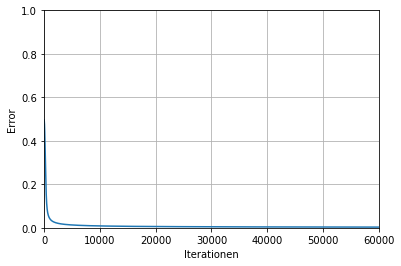

In [6]:
plt.xlim([0,iterations])
plt.ylim([0,1])
plt.grid()
plt.xlabel('Iterationen')
plt.ylabel('Error')
plt.plot(est_errors)

print("Output After Training:")
print(l2)